#### 1. Setup

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### 2. Load Data

In [113]:
df = pd.read_csv("Match_dataset.csv")
result = pd.read_csv("match_results.csv")

In [114]:
df = pd.merge(df,result)

In [115]:
print(df.duplicated().sum())

0


In [116]:
df.columns

Index(['Match_ID', 'Date', 'Venue', 'Team_A', 'Team_B', 'Stage',
       'Team_A_Ranking', 'Team_B_Ranking', 'Team_A_Form', 'Team_B_Form',
       'HeadToHead_A_Wins', 'HeadToHead_B_Wins', 'Venue_HomeAdvantage_A',
       'Venue_HomeAdvantage_B', 'Pitch_Type', 'Avg_T20_Score_Venue',
       'Toss_Winner', 'Toss_Decision', 'Team_A_Tech_Index',
       'Team_B_Tech_Index', 'Match_Total', 'Winner'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Match_ID               600 non-null    object 
 1   Date                   600 non-null    object 
 2   Venue                  600 non-null    object 
 3   Team_A                 600 non-null    object 
 4   Team_B                 600 non-null    object 
 5   Stage                  600 non-null    object 
 6   Team_A_Ranking         600 non-null    int64  
 7   Team_B_Ranking         600 non-null    int64  
 8   Team_A_Form            600 non-null    float64
 9   Team_B_Form            600 non-null    float64
 10  HeadToHead_A_Wins      600 non-null    int64  
 11  HeadToHead_B_Wins      600 non-null    int64  
 12  Venue_HomeAdvantage_A  600 non-null    int64  
 13  Venue_HomeAdvantage_B  600 non-null    int64  
 14  Pitch_Type             600 non-null    object 
 15  Avg_T2

In [118]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
categorical = df.select_dtypes(include=["object"])

In [119]:
df.head()

,Match_ID,Date,Venue,Team_A,Team_B,Stage,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,...,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Pitch_Type,Avg_T20_Score_Venue,Toss_Winner,Toss_Decision,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total,Winner
0,M0001,2026-03-06,Chennai,New Zealand,Scotland,Super8,5,13,76.97,54.62,...,0,0,Spin-Friendly,155,Team_A,Field,251.27,156.37,168,Team_A
1,M0002,2026-03-07,Mumbai,South Africa,Sri Lanka,Final,6,9,64.19,58.75,...,0,0,Flat,175,Team_B,Bat,249.33,187.44,150,Team_A
2,M0003,2026-03-02,Kolkata,India,PNG,Group,1,20,69.87,45.14,...,1,0,Spin-Friendly,165,Team_B,Field,298.24,54.03,160,Team_A
3,M0004,2026-02-22,Colombo,Netherlands,Ireland,Group,11,12,85.59,61.94,...,0,0,Spin-Friendly,160,Team_A,Bat,197.19,174.95,145,Team_A
4,M0005,2026-02-28,Mumbai,Namibia,South Africa,Group,15,6,45.98,88.52,...,0,0,Flat,175,Team_B,Bat,124.91,271.68,185,Team_B


In [120]:
df.drop('Match_ID', axis=1, inplace=True) # match id is not important
df.drop('Date', axis=1, inplace=True)

#### Columns types
- Numerical = Team_A_Ranking, Team_B_Ranking,Team_A_Form, Team_B_Form,HeadToHead_A_Wins, HeadToHead_B_Wins, Venue_HomeAdvantage_AVenue_HomeAdvantage_B, Avg_T20_Score_Venue, 'Team_A_Tech_Index,Team_B_Tech_Index, 'Match_Total

- Categorical = Venue, Team_A, Team_B, Stage, Pitch_Type, Toss_Winner, Toss_Decision, Winner

#### EDA

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Venue                  600 non-null    object 
 1   Team_A                 600 non-null    object 
 2   Team_B                 600 non-null    object 
 3   Stage                  600 non-null    object 
 4   Team_A_Ranking         600 non-null    int64  
 5   Team_B_Ranking         600 non-null    int64  
 6   Team_A_Form            600 non-null    float64
 7   Team_B_Form            600 non-null    float64
 8   HeadToHead_A_Wins      600 non-null    int64  
 9   HeadToHead_B_Wins      600 non-null    int64  
 10  Venue_HomeAdvantage_A  600 non-null    int64  
 11  Venue_HomeAdvantage_B  600 non-null    int64  
 12  Pitch_Type             600 non-null    object 
 13  Avg_T20_Score_Venue    600 non-null    int64  
 14  Toss_Winner            600 non-null    object 
 15  Toss_D

In [126]:
df['Team_A_Ranking'].describe()

count    600.000000
mean      10.580000
std        5.821519
min        1.000000
25%        6.000000
50%       11.000000
75%       16.000000
max       20.000000
Name: Team_A_Ranking, dtype: float64

<Axes: ylabel='Frequency'>

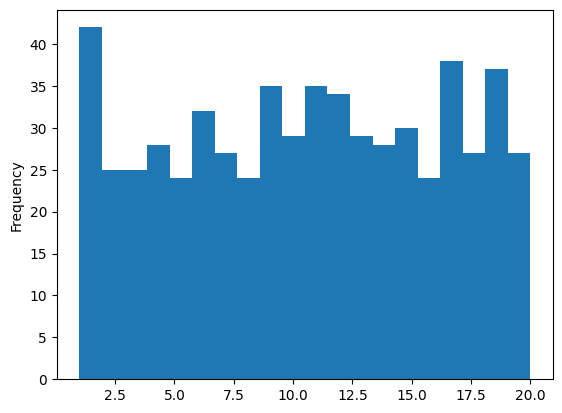

In [131]:
df['Team_A_Ranking'].plot(kind='hist',bins=20)

<Axes: >

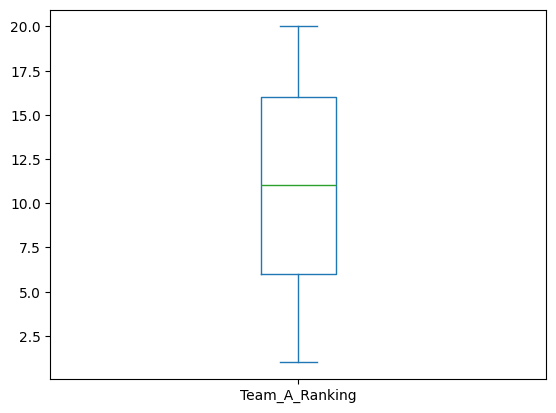

In [132]:
df['Team_A_Ranking'].plot(kind='box')

<Axes: >

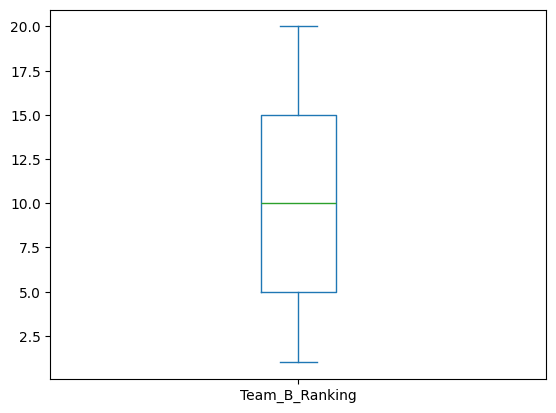

In [134]:
df['Team_B_Ranking'].plot(kind='box')

<Axes: ylabel='Frequency'>

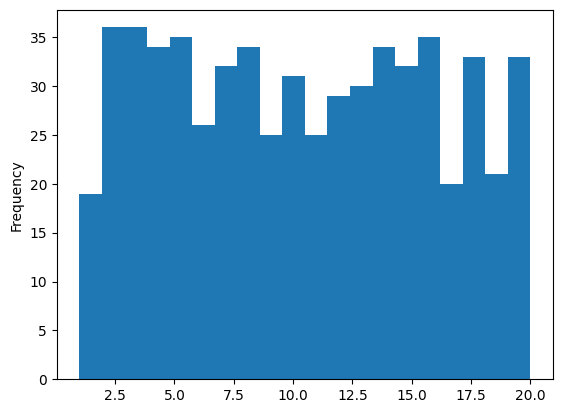

In [135]:
df['Team_B_Ranking'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

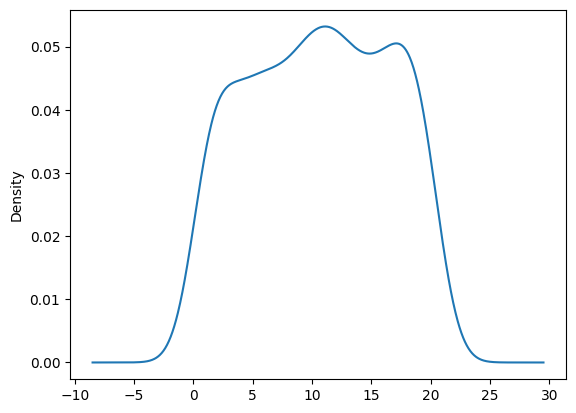

In [138]:
df['Team_A_Ranking'].plot(kind='kde')

<Axes: ylabel='Density'>

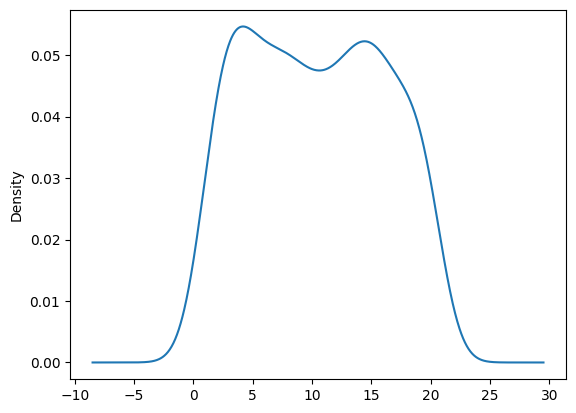

In [136]:
df['Team_B_Ranking'].plot(kind='kde')

In [140]:
print(df['Team_A_Ranking'].unique())

[ 5  6  1 11 15  8 17 16 18  4 12 19  9 20 13  2 14  3  7 10]


<Axes: ylabel='Density'>

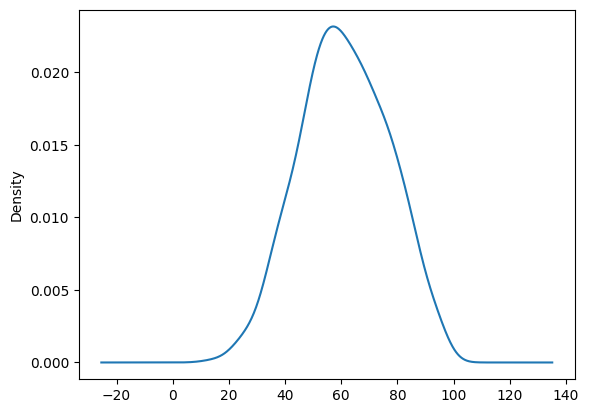

In [142]:
df['Team_A_Form'].plot(kind='kde')

In [145]:
df[df['Team_A_Form'],['Team_B_Form']].plot(kind="kde")

InvalidIndexError: (0      76.97
1      64.19
2      69.87
3      85.59
4      45.98
       ...  
595    77.24
596    85.50
597    36.86
598    48.37
599    56.36
Name: Team_A_Form, Length: 600, dtype: float64, ['Team_B_Form'])